In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/BTL_TICH_HOP/Customer_Segmentation_VN.csv")
df.head(5)

,first_name,last_name,title,gender,email,city,country,latitude,longtitude,phone,street_number,street_sufix,company_name,department,job_title,ip_address,purchase_amount
0,Gordy,Itzcovichch,Dr,Male,gitzcovichch0@aboutads.info,Xuân Trường,Vietnam,20.299331,106.358153,850-367-2142,83763,Park,Shuffledrive,Legal,Nurse Practicioner,74.222.137.22,$7.45
1,Pauline,Pendre,Mr,Female,ppendre1@vkontakte.ru,Plei Kần,Vietnam,14.704332,107.698488,955-464-4079,7,Plaza,Kimia,Training,Speech Pathologist,173.23.188.152,$2.92
2,Diahann,Overel,Ms,Female,doverel2@typepad.com,Tuy Phước,Vietnam,13.856503,109.164221,919-377-9767,1,Center,Wikivu,Accounting,Civil Engineer,2.236.114.210,$0.38
3,Diandra,Clamp,Rev,Female,dclamp3@nyu.edu,Tân Hiệp,Vietnam,10.115436,105.283440,260-447-0429,621,Park,Shufflester,Training,Actuary,81.57.54.113,$7.05
4,Toma,Odom,Dr,Female,todom4@washington.edu,Qui Nhon,Vietnam,13.782967,109.219663,552-813-6548,962,Point,Riffpedia,Human Resources,Accountant I,250.63.16.182,$9.15


In [ ]:
#in thông tin của data để có thể nhìn hiểu 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   first_name       100000 non-null  object 
 1   last_name        100000 non-null  object 
 2   title            100000 non-null  object 
 3   gender           100000 non-null  object 
 4   email            100000 non-null  object 
 5   city             100000 non-null  object 
 6   country          100000 non-null  object 
 7   latitude         100000 non-null  float64
 8   longtitude       100000 non-null  float64
 9   phone            100000 non-null  object 
 10  street_number    100000 non-null  int64  
 11  street_sufix     100000 non-null  object 
 12  company_name     100000 non-null  object 
 13  department       100000 non-null  object 
 14  job_title        100000 non-null  object 
 15  ip_address       100000 non-null  object 
 16  purchase_amount  99862 non-null   objec

In [ ]:
#Loại bỏ các kí tự và chuyển định dạng 
df['purchase_amount'] = df['purchase_amount'].str.replace('$', '')
df['purchase_amount'] = df['purchase_amount'].astype('float')

<ipython-input-4-8cf14f586123>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['purchase_amount'] = df['purchase_amount'].str.replace('$', '')


In [ ]:
#fill NaN băng mean
mean_purchase_amount = df['purchase_amount'].mean()
df['purchase_amount'].fillna(mean_purchase_amount, inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   first_name       100000 non-null  object 
 1   last_name        100000 non-null  object 
 2   title            100000 non-null  object 
 3   gender           100000 non-null  object 
 4   email            100000 non-null  object 
 5   city             100000 non-null  object 
 6   country          100000 non-null  object 
 7   latitude         100000 non-null  float64
 8   longtitude       100000 non-null  float64
 9   phone            100000 non-null  object 
 10  street_number    100000 non-null  int64  
 11  street_sufix     100000 non-null  object 
 12  company_name     100000 non-null  object 
 13  department       100000 non-null  object 
 14  job_title        100000 non-null  object 
 15  ip_address       100000 non-null  object 
 16  purchase_amount  100000 non-null  float

In [ ]:
df.describe()

,latitude,longtitude,street_number,purchase_amount
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,16.270143,106.460145,11086.009430,4.987855
std,4.787457,1.337669,23338.173512,2.887460
min,8.700928,102.575703,0.000000,0.000000
25%,11.032811,105.570887,23.000000,2.490000
50%,16.272543,106.299291,449.000000,4.987855
75%,21.025682,107.337579,6864.000000,7.490000
max,23.002927,109.222196,99998.000000,10.000000


In [ ]:
!pip install cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 57.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 64.6 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp310-cp310-linux_x86_64.whl size=11102749 sha256=86214fe17304b186c3d212dc4a20bb76cd905624aab264bc8b6607be43022d22
  Stored in directory: /root/.cache/pip/wheels/30/b0/1a/1c1909e00c76653dc4e2ff48555257c0eb2d1698280c8d9955
Successfully built cartopy


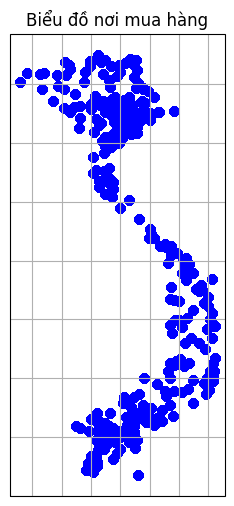

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs


# Vẽ biểu đồ địa lý
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Vẽ các điểm tọa độ
ax.scatter(df['longtitude'], df['latitude'], color='blue', marker='o', transform=ccrs.PlateCarree())

# Đặt tên cho trục và tiêu đề biểu đồ
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Biểu đồ nơi mua hàng')

# Thêm dải đồng vị kinh độ và vĩ độ
ax.gridlines()

# Hiển thị biểu đồ
plt.show()


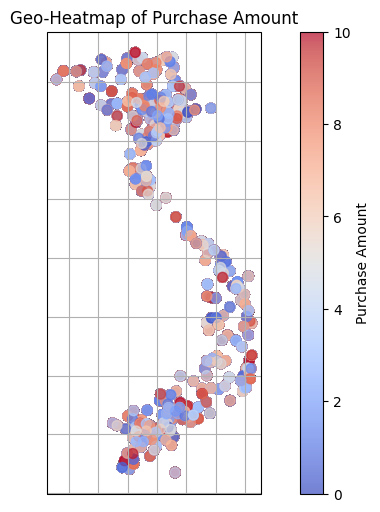

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Lấy các cột tọa độ và số lượng mua hàng
latitude = df['latitude']
longitude = df['longtitude']
purchase_amount = df['purchase_amount']

# Vẽ biểu đồ địa lý với màu sắc dựa trên số lượng mua hàng
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
sc = ax.scatter(longitude, latitude, c=purchase_amount, cmap='coolwarm', s=50, alpha=0.7, transform=ccrs.PlateCarree())
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Geo-Heatmap of Purchase Amount')
ax.gridlines()

# Thêm colorbar để hiển thị phân phối số lượng mua hàng
cbar = fig.colorbar(sc)
cbar.set_label('Purchase Amount')

# Hiển thị biểu đồ
plt.show()


In [ ]:
test = df[['latitude', 'longtitude']]


In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=2aac71ebb9ef68c949839b03e8bcfc1f5cc74a7b83d9354dfd21a92001669f5b
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q "https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz"

!tar xf "spark-3.1.2-bin-hadoop3.2.tgz"
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop3.2"

import findspark
findspark.init()

In [ ]:
from pyspark.ml.clustering import BisectingKMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import SparkSession

# Khởi tạo SparkSession
spark = SparkSession.builder.appName("AHC").getOrCreate()

# Tạo DataFrame từ dữ liệu đầu vào
df = spark.read.csv("/content/drive/MyDrive/BTL_TICH_HOP/Customer_Segmentation_VN.csv", header=True, inferSchema=True)

from pyspark.sql.functions import regexp_replace, col
from pyspark.sql.types import FloatType

# Loại bỏ kí tự $
df = df.withColumn('purchase_amount', regexp_replace(col('purchase_amount'), '\$', ''))

# Chuyển đổi thành kiểu dữ liệu float
df = df.withColumn('purchase_amount', df['purchase_amount'].cast(FloatType()))
from pyspark.sql.functions import mean

# Tính giá trị trung bình
mean_purchase_amount = df.select(mean('purchase_amount')).first()[0]

# Điền các giá trị null bằng giá trị trung bình
df = df.fillna(mean_purchase_amount, subset=['purchase_amount'])

# Tạo VectorAssembler để biến đổi các cột dữ liệu thành vector
vectorAssembler = VectorAssembler(inputCols=["longtitude", "latitude"], outputCol="features")
df_vector = vectorAssembler.transform(df)

# Xây dựng mô hình BisectingKMeans
ahc = BisectingKMeans(k=3)
model = ahc.fit(df_vector)

# Gán nhãn cho các điểm dữ liệu
predictions = model.transform(df_vector)

# Hiển thị kết quả
predictions.show()

# Đánh giá kết quả phân cụm
silhouette = model.computeCost(df_vector)
print("Silhouette score:", silhouette)


+----------+-----------+---------+-----------+--------------------+-------------------+-------+----------+-----------+------------+-------------+------------+------------+--------------------+--------------------+--------------+---------------+--------------------+----------+
|first_name|  last_name|    title|     gender|               email|               city|country|  latitude| longtitude|       phone|street_number|street_sufix|company_name|          department|           job_title|    ip_address|purchase_amount|            features|prediction|
+----------+-----------+---------+-----------+--------------------+-------------------+-------+----------+-----------+------------+-------------+------------+------------+--------------------+--------------------+--------------+---------------+--------------------+----------+
|     Gordy|Itzcovichch|       Dr|       Male|gitzcovichch0@abo...|        Xuân Trường|Vietnam|20.2993311|106.3581527|850-367-2142|        83763|        Park|Shuffledriv

In [ ]:
import pandas as pd
from pyspark.conf import SparkConf
from pyspark.context import SparkContext
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

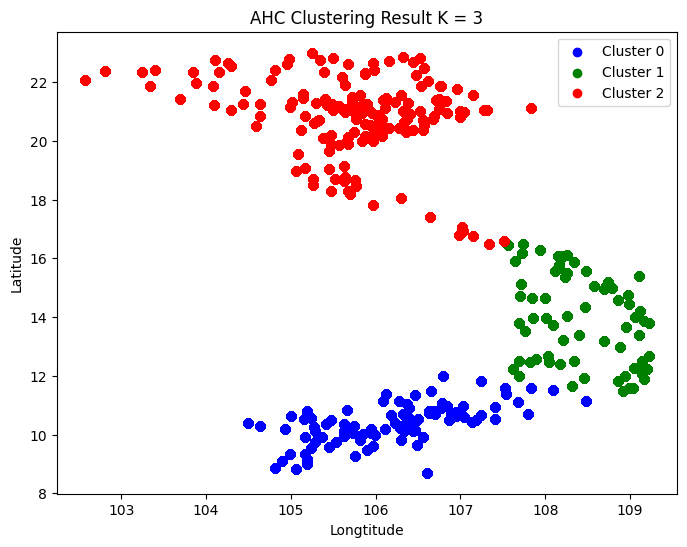

In [ ]:
import matplotlib.pyplot as plt

# Chuyển đổi DataFrame của Spark thành Pandas DataFrame
df_pd = predictions.select("longtitude", "latitude", "prediction").toPandas()

# Trực quan hóa dữ liệu và nhãn phân cụm
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red', 'orange', 'purple']  # Màu sắc cho từng nhóm phân cụm
for cluster_id in range(3):
    cluster_points = df_pd[df_pd['prediction'] == cluster_id]
    plt.scatter(cluster_points['longtitude'], cluster_points['latitude'], color=colors[cluster_id], label=f'Cluster {cluster_id}')
plt.xlabel("Longtitude")
plt.ylabel("Latitude")
plt.title("AHC Clustering Result K = 3")
plt.legend()
plt.show()


In [ ]:
from pyspark.sql.functions import count

# Đếm số điểm trong mỗi nhóm phân cụm
cluster_counts = predictions.groupBy("prediction").agg(count("*").alias("count"))

# Hiển thị số điểm trong mỗi nhóm
cluster_counts.show()


+----------+-----+
|prediction|count|
+----------+-----+
|         1|21540|
|         2|49138|
|         0|29322|
+----------+-----+



In [ ]:
prediction1 = predictions.toPandas()
df1 = prediction1.loc[:,["latitude","longtitude","prediction"]]



In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs


def locating(data):
  plt.figure(figsize = (5, 10))
  plt.scatter(data['longtitude'], data['latitude'], c = LabelEncoder().fit_transform(data["prediction"]), alpha = 0.5)

  conf = SparkConf().setAppName("K-means").setMaster("local[*]")
  sc = SparkContext.getOrCreate(conf)


  clustered = sc.parallelize(np.array(data)).map(lambda x: [int(x[2]), np.array([x[0], x[1]])]).groupByKey().mapValues(list).map(lambda x: [x[0], np.vstack(x[1])]).map(lambda x: np.array([np.quantile(x[1][:, 0], 0.25),
                                                                                                                                                 np.quantile(x[1][:, 0], 0.5),
                                                                                                                                                 np.quantile(x[1][:, 0], 0.75),
                                                                                                                                                 np.quantile(x[1][:, 1], 0.25),
                                                                                                                                                 np.quantile(x[1][:, 1], 0.5),
                                                                                                                                                 np.quantile(x[1][:, 1], 0.75)])).collect()
  sc.stop()

  for i in clustered:
    y = [i[0], i[0], i[2], i[2], i[0]]
    x = [i[3], i[5], i[5], i[3], i[3]]

    O = [(i[0] + i[2]) / 2, (i[3] + i[5]) / 2]

    plt.fill(x, y, alpha = 0.3)
    plt.scatter(i[4], i[1], s = 100, c='r')
    plt.plot(x, y)
    print(f'Square [[({i[3]}) , ({i[0]})],[({i[5]}) , ({i[0]})],[({i[5]}) , ({i[2]})],[({i[3]}) , ({i[2]})]], dot [({i[4]}) , ({i[1]})]')

  plt.show()

Square [[(105.348246) , (20.3231704)],[(106.3365828) , (20.3231704)],[(106.3365828) , (21.5743109)],[(105.348246) , (21.5743109)]], dot [(105.8180306) , (21.027964)]
Square [[(105.4771084) , (10.0622567)],[(106.7012968) , (10.0622567)],[(106.7012968) , (10.7900517)],[(105.4771084) , (10.7900517)]], dot [(106.2992912) , (10.4825247)]
Square [[(108.0150796) , (12.5049537)],[(108.9739954) , (12.5049537)],[(108.9739954) , (15.1860945)],[(108.0150796) , (15.1860945)]], dot [(108.3356312) , (13.9645426)]


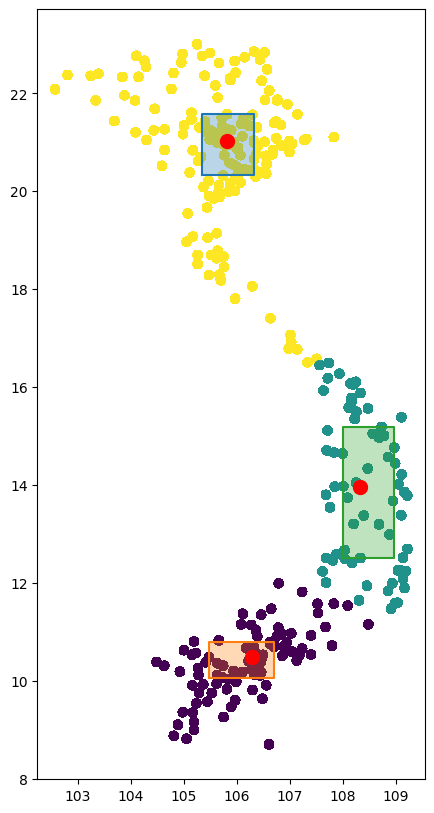

In [ ]:
locating(df1)

In [ ]:
from pyspark.ml.clustering import BisectingKMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import SparkSession

# Khởi tạo SparkSession
spark = SparkSession.builder.appName("AHC").getOrCreate()

# Tạo DataFrame từ dữ liệu đầu vào
df = spark.read.csv("/content/drive/MyDrive/BTL_TICH_HOP/Customer_Segmentation_VN.csv", header=True, inferSchema=True)

from pyspark.sql.functions import regexp_replace, col
from pyspark.sql.types import FloatType

# Loại bỏ kí tự $
df = df.withColumn('purchase_amount', regexp_replace(col('purchase_amount'), '\$', ''))

# Chuyển đổi thành kiểu dữ liệu float
df = df.withColumn('purchase_amount', df['purchase_amount'].cast(FloatType()))
from pyspark.sql.functions import mean

# Tính giá trị trung bình
mean_purchase_amount = df.select(mean('purchase_amount')).first()[0]

# Điền các giá trị null bằng giá trị trung bình
df = df.fillna(mean_purchase_amount, subset=['purchase_amount'])

# Tạo VectorAssembler để biến đổi các cột dữ liệu thành vector
vectorAssembler = VectorAssembler(inputCols=["longtitude", "latitude"], outputCol="features")
df_vector = vectorAssembler.transform(df)

# Xây dựng mô hình BisectingKMeans
ahc = BisectingKMeans(k=5)
model_1 = ahc.fit(df_vector)

# Gán nhãn cho các điểm dữ liệu
predictions_1 = model_1.transform(df_vector)

# Hiển thị kết quả
predictions_1.show()


+----------+-----------+---------+-----------+--------------------+-------------------+-------+----------+-----------+------------+-------------+------------+------------+--------------------+--------------------+--------------+---------------+--------------------+----------+
|first_name|  last_name|    title|     gender|               email|               city|country|  latitude| longtitude|       phone|street_number|street_sufix|company_name|          department|           job_title|    ip_address|purchase_amount|            features|prediction|
+----------+-----------+---------+-----------+--------------------+-------------------+-------+----------+-----------+------------+-------------+------------+------------+--------------------+--------------------+--------------+---------------+--------------------+----------+
|     Gordy|Itzcovichch|       Dr|       Male|gitzcovichch0@abo...|        Xuân Trường|Vietnam|20.2993311|106.3581527|850-367-2142|        83763|        Park|Shuffledriv

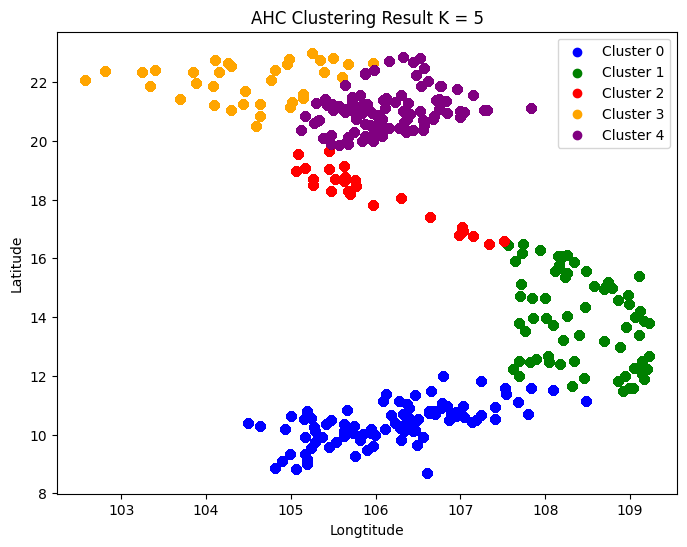

In [ ]:
import matplotlib.pyplot as plt

# Chuyển đổi DataFrame của Spark thành Pandas DataFrame
df_pd = predictions_1.select("longtitude", "latitude", "prediction").toPandas()

# Trực quan hóa dữ liệu và nhãn phân cụm
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red', 'orange', 'purple']  # Màu sắc cho từng nhóm phân cụm
for cluster_id in range(5):
    cluster_points = df_pd[df_pd['prediction'] == cluster_id]
    plt.scatter(cluster_points['longtitude'], cluster_points['latitude'], color=colors[cluster_id], label=f'Cluster {cluster_id}')
plt.xlabel("Longtitude")
plt.ylabel("Latitude")
plt.title("AHC Clustering Result K = 5")
plt.legend()
plt.show()


In [ ]:
prediction2 = predictions_1.toPandas()
df2 = prediction2.loc[:,["latitude","longtitude","prediction"]]

In [ ]:
df2

,latitude,longtitude,prediction
0,20.299331,106.358153,4
1,14.704332,107.698488,1
2,13.856503,109.164221,1
3,10.115436,105.283440,0
4,13.782967,109.219663,1
...,...,...,...
99995,14.334806,108.475085,1
99996,21.853708,106.761519,4
99997,20.441631,106.108110,4
99998,21.339282,106.232725,4


Square [[(105.7308045) , (20.579097)],[(106.5260001) , (20.579097)],[(106.5260001) , (21.355574)],[(105.7308045) , (21.355574)]], dot [(106.0169971) , (21.0180725)]
Square [[(105.4771084) , (10.0622567)],[(106.7012968) , (10.0622567)],[(106.7012968) , (10.7900517)],[(105.4771084) , (10.7900517)]], dot [(106.2992912) , (10.4825247)]
Square [[(105.4536718) , (17.0633593)],[(106.9830865) , (17.0633593)],[(106.9830865) , (18.7853365)],[(105.4536718) , (18.7853365)]], dot [(105.6745247) , (18.4529003)]
Square [[(108.0150796) , (12.5049537)],[(108.9739954) , (12.5049537)],[(108.9739954) , (15.1860945)],[(108.0150796) , (15.1860945)]], dot [(108.3356312) , (13.9645426)]
Square [[(104.0836104) , (21.4364892)],[(105.1492869) , (21.4364892)],[(105.1492869) , (22.6194565)],[(104.0836104) , (22.6194565)]], dot [(104.5917494) , (22.1623468)]


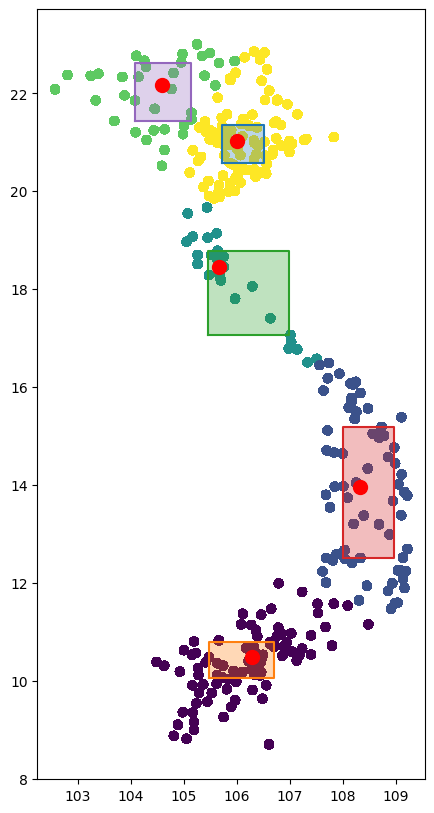

In [ ]:
locating(df2)

In [ ]:
from pyspark.ml.clustering import BisectingKMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import SparkSession

# Khởi tạo SparkSession
spark = SparkSession.builder.appName("AHC").getOrCreate()

# Tạo DataFrame từ dữ liệu đầu vào
df = spark.read.csv("/content/drive/MyDrive/BTL_TICH_HOP/Customer_Segmentation_VN.csv", header=True, inferSchema=True)

from pyspark.sql.functions import regexp_replace, col
from pyspark.sql.types import FloatType

# Loại bỏ kí tự $
df = df.withColumn('purchase_amount', regexp_replace(col('purchase_amount'), '\$', ''))

# Chuyển đổi thành kiểu dữ liệu float
df = df.withColumn('purchase_amount', df['purchase_amount'].cast(FloatType()))
from pyspark.sql.functions import mean

# Tính giá trị trung bình
mean_purchase_amount = df.select(mean('purchase_amount')).first()[0]

# Điền các giá trị null bằng giá trị trung bình
df = df.fillna(mean_purchase_amount, subset=['purchase_amount'])

# Tạo VectorAssembler để biến đổi các cột dữ liệu thành vector
vectorAssembler = VectorAssembler(inputCols=["longtitude", "latitude"], outputCol="features")
df_vector = vectorAssembler.transform(df)

# Xây dựng mô hình BisectingKMeans
ahc_2 = BisectingKMeans(k=7)
model_2 = ahc_2.fit(df_vector)

# Gán nhãn cho các điểm dữ liệu
predictions_2 = model_2.transform(df_vector)

# Hiển thị kết quả
predictions_2.show()


+----------+-----------+---------+-----------+--------------------+-------------------+-------+----------+-----------+------------+-------------+------------+------------+--------------------+--------------------+--------------+---------------+--------------------+----------+
|first_name|  last_name|    title|     gender|               email|               city|country|  latitude| longtitude|       phone|street_number|street_sufix|company_name|          department|           job_title|    ip_address|purchase_amount|            features|prediction|
+----------+-----------+---------+-----------+--------------------+-------------------+-------+----------+-----------+------------+-------------+------------+------------+--------------------+--------------------+--------------+---------------+--------------------+----------+
|     Gordy|Itzcovichch|       Dr|       Male|gitzcovichch0@abo...|        Xuân Trường|Vietnam|20.2993311|106.3581527|850-367-2142|        83763|        Park|Shuffledriv

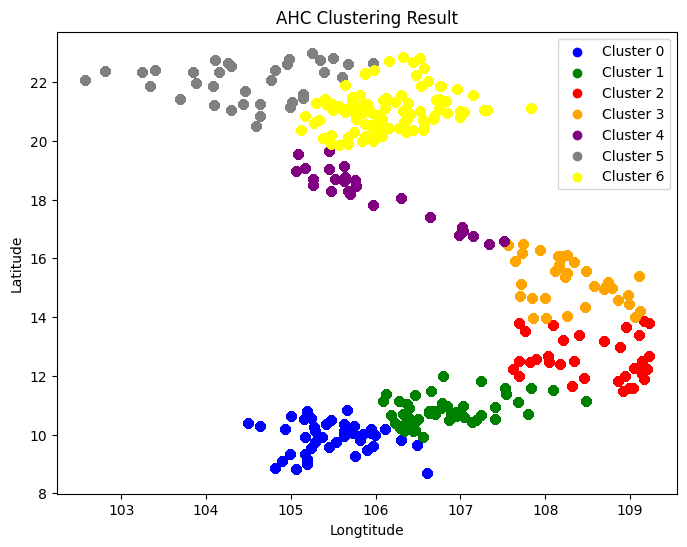

In [ ]:
import matplotlib.pyplot as plt

# Chuyển đổi DataFrame của Spark thành Pandas DataFrame
df_pd = predictions_2.select("longtitude", "latitude", "prediction").toPandas()

# Trực quan hóa dữ liệu và nhãn phân cụm
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red', 'orange', 'purple','gray','yellow']  # Màu sắc cho từng nhóm phân cụm
for cluster_id in range(7):
    cluster_points = df_pd[df_pd['prediction'] == cluster_id]
    plt.scatter(cluster_points['longtitude'], cluster_points['latitude'], color=colors[cluster_id], label=f'Cluster {cluster_id}')
plt.xlabel("Longtitude")
plt.ylabel("Latitude")
plt.title("AHC Clustering Result")
plt.legend()
plt.show()


Square [[(105.7308045) , (20.579097)],[(106.5260001) , (20.579097)],[(106.5260001) , (21.355574)],[(105.7308045) , (21.355574)]], dot [(106.0169971) , (21.0180725)]
Square [[(108.042083) , (12.0036455)],[(109.1068822) , (12.0036455)],[(109.1068822) , (13.204053)],[(108.042083) , (13.204053)]], dot [(108.8551484) , (12.4866658)]
Square [[(105.1726816) , (9.5713437)],[(105.7557791) , (9.5713437)],[(105.7557791) , (10.3578054)],[(105.1726816) , (10.3578054)]], dot [(105.4185406) , (10.029192)]
Square [[(105.4536718) , (17.0633593)],[(106.9830865) , (17.0633593)],[(106.9830865) , (18.7853365)],[(105.4536718) , (18.7853365)]], dot [(105.6745247) , (18.4529003)]
Square [[(107.9394761) , (14.641214)],[(108.7125791) , (14.641214)],[(108.7125791) , (15.9272632)],[(107.9394761) , (15.9272632)]], dot [(108.2286504) , (15.1860945)]
Square [[(106.3905338) , (10.5083266)],[(107.0480378) , (10.5083266)],[(107.0480378) , (11.0841596)],[(106.3905338) , (11.0841596)]], dot [(106.6679542) , (10.7480929)]

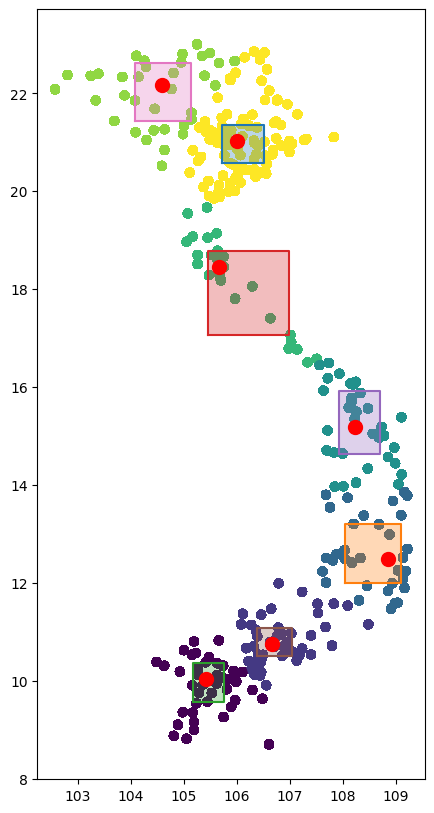

In [ ]:

prediction3 = predictions_2.toPandas()
df3 = prediction3.loc[:,["latitude","longtitude","prediction"]]
locating(df3)